In [1]:
import pandas as pd
import numpy as np
import sklearn

# A~F Group은 cv = 10
# H Group은 cv = 4 로 지정
cv = 15

# todo ##### read_excel() 읽어올 시트 지정하기 ####################
#new_dataset = '210901___rawdata_A.xlsx'
#new_dataset = '210901___rawdata_B.xlsx'
#new_dataset = '210901___rawdata_C.xlsx'
#new_dataset = '210901___rawdata_D.xlsx'
#new_dataset = '210901___rawdata_E.xlsx'
#new_dataset = '210901___rawdata_F.xlsx'
#new_dataset = '210901___rawdata_H.xlsx'
#new_dataset = '210902___rawdata_TOTAL.xlsx'

path = 'dataset/'
#new_dataset = 'A_group.csv'
#new_dataset = 'B_group.csv'
#new_dataset = 'B_group_0.csv'
#new_dataset = 'B_group_1.csv'
#new_dataset = 'B_group_2.csv'
#new_dataset = 'B_group_3.csv'
#new_dataset = 'C_group.csv'
new_dataset = 'D_group.csv'
#new_dataset = 'D_group_0.csv'
#new_dataset = 'D_group_1.csv'
#new_dataset = 'D_group_2.csv'
#new_dataset = 'D_group_3.csv'
#new_dataset = 'E_group.csv'

#new_dataset = pd.read_excel(new_dataset, sheet_name='regression3', engine='openpyxl')
new_dataset = pd.read_csv(path + new_dataset)

In [2]:
print(new_dataset)

     Unnamed: 0  Speed(RPM)  Torque(kg.cm)  Coil Dia  Coil R  Coil Turn  \
0             8      2548.0            2.5      0.37   24.50      360.0   
1            17      1678.0            5.0      0.37   24.50      360.0   
2            23      1341.0            7.5      0.37   24.50      360.0   
3            24      1145.0           10.0      0.37   24.50      360.0   
4            25      1032.0           12.5      0.37   24.50      360.0   
..          ...         ...            ...       ...     ...        ...   
359         521      1882.0           25.5      0.62    7.16      175.0   
360         522      1692.0           30.6      0.62    7.16      175.0   
361         523      1568.0           35.7      0.62    7.16      175.0   
362         524      1400.0           38.8      0.62    7.16      175.0   
363         525      1200.0           40.8      0.62    7.16      175.0   

     Core Thick  Core Dia  Poles  Motor_name_idx label  
0          35.0      95.0    8.0          

### correlation matrix 

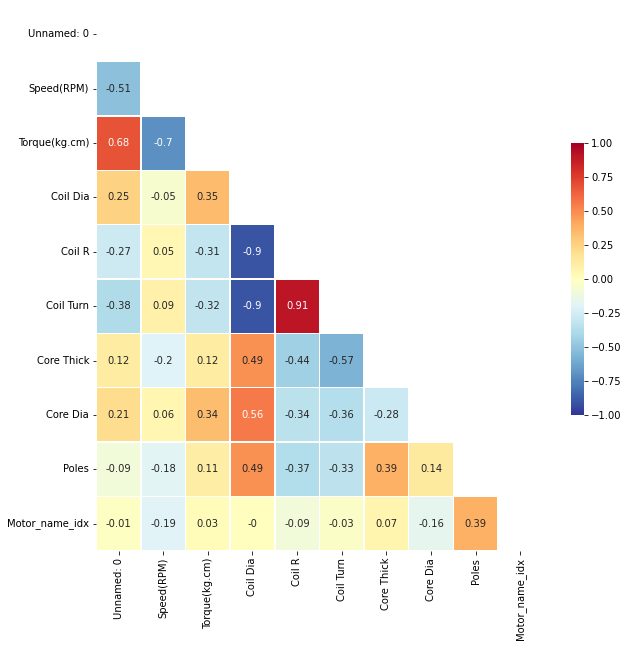

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# todo ##### Regression model 만들기 위해 Target변수 RPM과 높은 상관관계를 갖는 Feature선택 #####
correlation_matrix = new_dataset.corr().round(2)
mask = np.zeros_like(correlation_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, mask=mask, cmap='RdYlBu_r', linewidths=.5, cbar_kws={"shrink": .5}, vmin=-1, vmax=1)
plt.show()

### X,Y 설정 및 훈련/테스트 데이터 분리

In [4]:
features = ['Speed(RPM)','Torque(kg.cm)','Coil Dia','Coil R','Coil Turn','Core Thick','Core Dia','Coil Material','Poles','Slots','Magnet Material' ]
target = new_dataset['Speed(RPM)']

import matplotlib
from matplotlib import font_manager, rc
matplotlib.rcParams['axes.unicode_minus'] = False

# todo (210901)
X = pd.DataFrame(np.c_[new_dataset['Torque(kg.cm)'], new_dataset['Coil Dia'], new_dataset['Coil R'], new_dataset['Coil Turn'], new_dataset['Core Thick'], new_dataset['Core Dia'], new_dataset['Poles']], columns = ['Torque(kg.cm)','Coil Dia', 'Coil R', 'Coil Turn', 'Core Thick','Core Dia','Poles'])
Y = new_dataset['Speed(RPM)']
RANDOM_SEED = 1234
SPLIT_SIZE = 0.05
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = SPLIT_SIZE, random_state=RANDOM_SEED)

print("X,Y는")
print(X.shape)
print(Y.shape)

print("train 은")
print(X_train.shape)
print(Y_train.shape,"\n")
print("test 는")
print(X_test.shape)
print(Y_test.shape)

X,Y는
(364, 7)
(364,)
train 은
(345, 7)
(345,) 

test 는
(19, 7)
(19,)


### GridSearch
- generate_polynomial 에 들어가는 매개변수인 best_model_step 지정

In [5]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

pipe_linear = Pipeline([
                #('scl1', MinMaxScaler()),
                #('scl2', StandardScaler()),
                ('poly', PolynomialFeatures(include_bias=False)),
                ('fit', LinearRegression())])

grid_params_linear = [{
        "poly__degree" : np.arange(1,5), 
        "fit__fit_intercept" : [True, False],
}]

GSCV = GridSearchCV(pipe_linear, grid_params_linear, 
                    scoring = "neg_mean_squared_error",
                    #scoring = 'r2',
                    cv=cv)

GSCV.fit(X_train, Y_train.values.ravel())
best_model_step = GSCV.best_estimator_

- best_model_step의 길이를 측정
- 길이가 35이면 2차항

In [6]:
print(best_model_step)
#print(np.round(best_model_step.named_steps['fit'].coef_,3))
length=len(np.round(best_model_step.named_steps['fit'].coef_,3))
print("length 는 :",length)

Pipeline(steps=[('poly', PolynomialFeatures(degree=3, include_bias=False)),
                ('fit', LinearRegression())])
length 는 : 119


 y 절편 = 4461.821569352336
The model performance for training set
--------------------------------------
R2 score is 0.9660670402204116


The model performance for testing set
--------------------------------------
RMSE is 226.48054895812726
R2 score is 0.9199790190177466


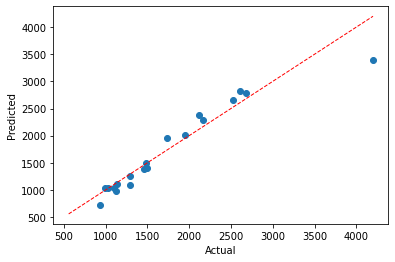

--------------------------------------
 다항식 : 
the regressor is not the quadratic polynomial


In [7]:
# 해당 항이 2차항일 경우
if length == 35:
    print("여기들어옴1")
    features = ['1', 'x1','x2','x3','x4','x5','x6','x7']
    coefs = np.round(best_model_step.named_steps['fit'].coef_,3).reshape(35,)
    num=0
    for i, feature1 in enumerate(features):
        for j in range(i, len(features)):
            if features[j]=='1':
                continue
            print(f"[{features[i]}*{features[j]}] 항의 계수 = {coefs[num]}")
            num=num+1


            
# y 절편
print(f" y 절편 = {np.round(best_model_step.named_steps['fit'].intercept_,20)}")

# todo ##### 모델 평가 ###############
y_train_predict = best_model_step.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)
print("The model performance for training set")
print("--------------------------------------")
# print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

y_test_predict = best_model_step.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

fig, ax = plt.subplots()
ax.scatter(Y_test, y_test_predict)
ax.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'r--', lw=1)
ax.set_xlabel('Actual')
ax.set_ylabel("Predicted")
plt.show()

# todo ##### 다항식 값 출력 ###############

x1 = 7.0    # Test 하기 원하시는 Torque 값 입력
x2 = 0.28   # Test 하기 원하시는 권선 코일결 값 입력
x3 = 87.0   # Test 하기 원하시는 권선 턴수 값 입력
x4 = 450.0  # Test 하기 원하시는 권선 턴수 값 입력
x5 = 26.5   # Test 하기 원하시는 코어 두께 값 입력
x6 = 88.0   # Test 하기 원하시는 코어 직경 값 입력
x7 = 8.0    # Test 하기 원하시는 Poles 값 입력

# 학습된 다항식 기반으로 RPM 계산
sum = 0
if length == 35:
    print("여기들어옴2")
    features = [1, x1,x2,x3,x4,x5,x6,x7]
    #features = [x7,x6,x5,x4,x3,x2,x1,1]
    
    coefs = best_model_step.named_steps['fit'].coef_.reshape(35,)
    num=0
    for i, feature1 in enumerate(features):
        for j in range(i, len(features)):
            if features[j]==1:
                continue
            #print(f"[{features[i]}*{features[j]}] 항의 계수 = {coefs[num]}")
            sum = sum + coefs[num]*features[i]*features[j]
            num=num+1

# todo ##### 다항식 출력 (문자열 형태) ###############

features_char = ['(1)', '(x1)','(x2)','(x3)','(x4)','(x5)','(x6)','(x7)']

def generate_polynomial(features_char, best_model_step, decimal_place=5):
    '''
    설명 : 회귀모델을 다항식 형태로 나타내기 위한 함수
    입력 : 사용될 feature 리스트, 다항식을 표현하기 원하는 회귀 모델, 표현할 다항식 계수의 소수점 아래자리
    출력 : 2차 다항식
    '''
    poly = ''
    if length == 35:
        coefs = np.round(best_model_step.named_steps['fit'].coef_.reshape(35,),decimal_place) 
        num=0
        for i, feature1 in enumerate(features):
            for j in range(i, len(features)):
                if features[j]==1:
                    continue

                if coefs[num]>0:
                    poly = poly + '+' + str(coefs[num]) + features_char[i] + features_char[j]+ ' '
                    
                elif coefs[num]<0:
                    poly = poly + str(coefs[num]) + features_char[i] + features_char[j]+ ' '
                    
                num=num+1
        return poly
    
    else:
        return 'the regressor is not the quadratic polynomial'
print("--------------------------------------")
poly = generate_polynomial(features_char, best_model_step, decimal_place=6) 
print(f" 다항식 : \n{poly}")


### 여기서부터 처음 본 부분

In [8]:
pred_lst = best_model_step.predict(X) # X넣어 예측한 값
true_lst = Y # 실제 값

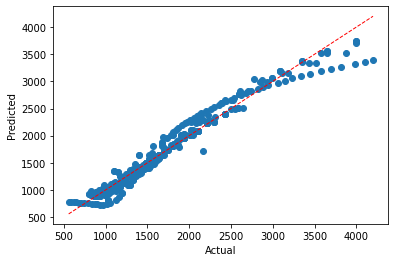

In [9]:
fig, ax = plt.subplots()
ax.scatter(true_lst, pred_lst)
ax.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'r--', lw=1)
ax.set_xlabel('Actual')
ax.set_ylabel("Predicted")
plt.show()

In [10]:
# 최대 오차값 업데이트

max_error_value = 0
for true,pred in zip(true_lst, pred_lst):
    if abs(pred-true)>max_error_value:
        max_error_value = abs(pred-true)

print(f"가장 큰 예측 결과 : {max_error_value}")

가장 큰 예측 결과 : 798.2254271691163


In [11]:
GSCV.best_params_

{'fit__fit_intercept': True, 'poly__degree': 3}

In [12]:
import pickle
import joblib
print(best_model_step)
#linear_model = pickle.dumps(best_model_step)
joblib.dump(best_model_step, './models/A_group_reg.pkl')
joblib.load('./models/A_group_reg.pkl')

Pipeline(steps=[('poly', PolynomialFeatures(degree=3, include_bias=False)),
                ('fit', LinearRegression())])


Pipeline(steps=[('poly', PolynomialFeatures(degree=3, include_bias=False)),
                ('fit', LinearRegression())])

In [13]:
#print(new_dataset)

In [14]:
set(new_dataset['Motor_name_idx'].values)

{0.0,
 1.0,
 3.0,
 5.0,
 7.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 21.0,
 22.0,
 24.0,
 25.0,
 26.0,
 32.0,
 34.0,
 35.0,
 41.0,
 42.0,
 43.0,
 47.0,
 51.0,
 52.0}

In [47]:
ds = new_dataset[new_dataset['Motor_name_idx'].astype(int)==15]
ds.head(60)

,Unnamed: 0,Speed(RPM),Torque(kg.cm),Coil Dia,Coil R,Coil Turn,Core Thick,Core Dia,Poles,Motor_name_idx,label
7,45,4200.0,0.6,0.37,45.0,320.0,32.5,104.0,8.0,15.0,D
8,49,4100.0,0.7,0.37,45.0,320.0,32.5,104.0,8.0,15.0,D
9,51,3989.0,0.8,0.37,45.0,320.0,32.5,104.0,8.0,15.0,D
10,54,3822.0,0.9,0.37,45.0,320.0,32.5,104.0,8.0,15.0,D
11,60,3701.0,1.0,0.37,45.0,320.0,32.5,104.0,8.0,15.0,D
12,65,3579.0,1.1,0.37,45.0,320.0,32.5,104.0,8.0,15.0,D
13,69,3450.0,1.2,0.37,45.0,320.0,32.5,104.0,8.0,15.0,D
14,71,3343.0,1.3,0.37,45.0,320.0,32.5,104.0,8.0,15.0,D
15,75,3232.0,1.4,0.37,45.0,320.0,32.5,104.0,8.0,15.0,D
16,81,3147.0,1.5,0.37,45.0,320.0,32.5,104.0,8.0,15.0,D


In [48]:
sample_X_label = ds['Speed(RPM)']
sample_X_label

7     4200.0
8     4100.0
9     3989.0
10    3822.0
11    3701.0
       ...  
66     683.0
67     649.0
68     616.0
69     581.0
70     558.0
Name: Speed(RPM), Length: 64, dtype: float64

In [49]:
sample_X = pd.DataFrame(np.c_[ds['Torque(kg.cm)'], ds['Coil Dia'], ds['Coil R'], ds['Coil Turn'], ds['Core Thick'], ds['Core Dia'], ds['Poles']],\
                        columns = ['Torque(kg.cm)','Coil Dia', 'Coil R', 'Coil Turn', 'Core Thick','Core Dia','Poles'])
sample_X.head(60)

,Torque(kg.cm),Coil Dia,Coil R,Coil Turn,Core Thick,Core Dia,Poles
0,0.6,0.37,45.0,320.0,32.5,104.0,8.0
1,0.7,0.37,45.0,320.0,32.5,104.0,8.0
2,0.8,0.37,45.0,320.0,32.5,104.0,8.0
3,0.9,0.37,45.0,320.0,32.5,104.0,8.0
4,1.0,0.37,45.0,320.0,32.5,104.0,8.0
5,1.1,0.37,45.0,320.0,32.5,104.0,8.0
6,1.2,0.37,45.0,320.0,32.5,104.0,8.0
7,1.3,0.37,45.0,320.0,32.5,104.0,8.0
8,1.4,0.37,45.0,320.0,32.5,104.0,8.0
9,1.5,0.37,45.0,320.0,32.5,104.0,8.0


In [50]:
sample_X_predict = best_model_step.predict(sample_X)
print(sample_X_predict)

[3401.77457283 3356.84178762 3312.39828597 3268.4415213  3224.96894705
 3181.97801665 3139.46618354 3097.43090114 3055.86962289 3014.77980223
 2974.15889259 2934.00434739 2894.31362008 2855.08416409 2816.31343285
 2777.99887978 2740.13795834 2702.72812194 2665.76682403 2629.25151803
 2593.17965738 2557.54869551 2522.35608586 2487.59928185 2453.27573692
 2419.38290451 2385.91823805 2352.87919097 2320.26321669 2288.06776867
 2256.29030033 2224.9282651  2193.97911641 2133.30929241 2103.58352396
 2074.26045579 2016.81223402 1960.94425456 1880.06067478 1853.86753243
 1681.00680119 1464.61263394 1351.09061178 1298.70031622 1281.86742067
 1249.1321546   945.93280686  870.4786275   818.55476209  752.09531615
  733.46769947  725.78919389  730.2196432   737.15771966  743.19905855
  746.58339676  753.97754805  759.99023517  764.18291077  766.32687413
  768.49919243  770.69731912  772.91870762  775.16081136]


The model performance for testing set
--------------------------------------
RMSE is 269.2147254203048
R2 score is 0.9247668485198384


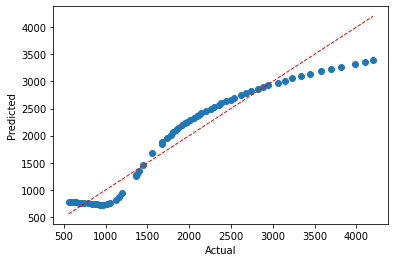

In [51]:
rmse = (np.sqrt(mean_squared_error(sample_X_label, sample_X_predict)))
r2 = r2_score(sample_X_label, sample_X_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

fig, ax = plt.subplots()
ax.scatter(sample_X_label, sample_X_predict)
ax.plot([sample_X_label.min(), sample_X_label.max()], [sample_X_label.min(), sample_X_label.max()], 'r--', lw=1)
ax.set_xlabel('Actual')
ax.set_ylabel("Predicted")
plt.show()

In [41]:
Y

0      2548.0
1      1678.0
2      1341.0
3      1145.0
4      1032.0
        ...  
359    1882.0
360    1692.0
361    1568.0
362    1400.0
363    1200.0
Name: Speed(RPM), Length: 364, dtype: float64